In [1]:
import pandas as pandas_lib
import numpy as numpy_lib
import seaborn as seaboorn_lib

In [16]:
data = pandas_lib.read_csv(r'D:\Coding\Life\Data Files/clean_dataa.csv')

CREAT PIVOT TABLE

c:\Users\Lokesh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRatingCount'>

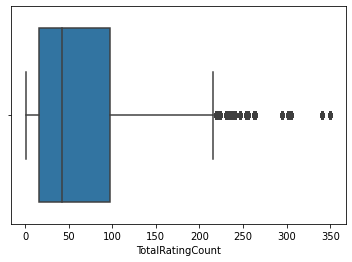

In [22]:
# Decide threshold value
# Find quantile values
seaboorn_lib.boxplot(data['TotalRatingCount'])

In [49]:
data['TotalRatingCount'].quantile()

42.0

In [48]:
for i in range(0,101,10):
    print(data['TotalRatingCount'].quantile(i/100))
    

1.0
5.0
11.0
20.0
29.0
42.0
61.0
80.0
112.0
164.0
350.0


In [52]:
Threshold_data = data[data['TotalRatingCount']>61]

In [ ]:
# threshold = 61
# data.query('TotalRatingCount >=@threshold')

In [55]:
movie_mat = Threshold_data.pivot_table(index='userId',columns='title',values='rating')

In [57]:
movie_mat['Airplane! (1980)']

userId
1      NaN
2      2.0
3      5.0
4      NaN
5      NaN
      ... 
698    NaN
699    4.0
700    NaN
701    NaN
702    NaN
Name: Airplane! (1980), Length: 697, dtype: float64

FIND CORELATION VALUES..
AUTOMATE OUR RECOMMENDATIONS..


In [59]:
similarity = movie_mat.corrwith(movie_mat['Airplane! (1980)'])

In [64]:
co_reln = similarity.sort_values(ascending=False).reset_index().rename(columns={0:'co-reln values'})

In [65]:
co_reln

,title,co-reln values
0,Airplane! (1980),1.000000
1,Casper (1995),0.680396
2,Galaxy Quest (1999),0.661684
3,"Bridge on the River Kwai, The (1957)",0.629462
4,"Santa Clause, The (1994)",0.603553
...,...,...
352,"Crying Game, The (1992)",-0.301612
353,Desperado (1995),-0.330267
354,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",-0.349704
355,Mr. Holland's Opus (1995),-0.357667


In [71]:
# We have to give key value pair in aggregate function
rat = Threshold_data.groupby('title').agg({'title':'count','rating':'mean'}).rename(columns={'title':'total_ratings','rating':'avg_rating'}).reset_index()

In [73]:
final_co_reln = co_reln.merge(rat,on='title')

In [74]:
final_co_reln.sort_values('co-reln values',ascending=False)[1:11]

,title,co-reln values,total_ratings,avg_rating
1,Casper (1995),0.680396,71,2.894366
2,Galaxy Quest (1999),0.661684,75,3.560000
3,"Bridge on the River Kwai, The (1957)",0.629462,65,4.030769
4,"Santa Clause, The (1994)",0.603553,92,3.358696
5,Unforgiven (1992),0.602800,79,3.791139
6,Tomorrow Never Dies (1997),0.602446,71,3.267606
7,Monty Python and the Holy Grail (1975),0.601236,166,4.186747
8,"Terminator, The (1984)",0.580656,160,3.912500
9,Coneheads (1993),0.556090,85,2.882353
10,Chicken Run (2000),0.544424,76,3.322368


In [87]:
# Function for recommendation
def recommend_movies(movie):
    similarit = movie_mat.corrwith(movie_mat[movie])
    return similarit.sort_values(ascending=False)
    

In [88]:
recommend_movies('Casper (1995)')[1:11]

title
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.880848
Pleasantville (1998)                                                                              0.866816
Notting Hill (1999)                                                                               0.802955
Talented Mr. Ripley, The (1999)                                                                   0.799671
City of God (Cidade de Deus) (2002)                                                               0.798554
Little Mermaid, The (1989)                                                                        0.794992
Naked Gun 33 1/3: The Final Insult (1994)                                                         0.781180
Last Action Hero (1993)                                                                           0.776395
Big (1988)                                                                                        0.770552
Beetlejuice (1988)             